In [12]:
import numpy as np
from itertools import combinations

test = np.array([1, 2, 4, 5])
print(list(combinations(test, 2)))



[(1, 2), (1, 4), (1, 5), (2, 4), (2, 5), (4, 5)]


In [54]:
# Main code and animation here
"""
This program simulates the collision of randomly created
particles in a box. It outputs 2 histograms showing the
distribution of speed speed and kinetic energy respectively.
It then uses the Maxwell-Boltzmann's analytical formula
to fit a curve to the histograms to find the temperature
of the system at the end of the particle collision frames.
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import combinations
from IPython.display import HTML

# Define variables and constants
npoint = 500 # Number of particles to create
nframe = 500 # Number of animation frames to create
xmin, xmax, ymin, ymax = 0, 1, 0, 1 # Box size
nDt = 1000 # Number of time stpes
Dt = 0.00002  # Time step (s)
p_radius = 0.0015 # Particle radius (m)
p_mass = 2.672 * 10 ** (-26) # Particle mass
vi = 500 # Initial velocity m/s due east or west
kB = 1.38 * (10 ** -23) # Boltzmann constant
collision_distance = 2 * (p_radius ** 2)


# Create random points
x = np.random.random(npoint)
y = np.random.random(npoint)
vx = -500. * np.ones(npoint)
vy = np.zeros(npoint)
vx[np.where(x <= 0.5)] = -vx[np.where(x <= 0.5)]

# Define possible combination indices
indices_arr = np.linspace(0, npoint -1, npoint)
combine_indices = np.asarray(list(combinations(indices_arr, 2)), 
                                dtype=np.int16)


# Define functions

# Index the vector's velocity and its position
def get_vec_vel_and_pos(index):
    """
    Indexes the velocity and position arrays and
    constructs a tuple containing 2 arrays of velocity
    and position respectively of the given index.

    Keyword arguments:
        index -- The index of the particle in the randomly
                 created velocity and position arrays.
    
    Returns:
        A tuple containing the velocity and position vector.
    """

    v1 = np.array([vx[index], vy[index]])
    r1 = np.array([x[index], y[index]])
    return v1, r1

# Update points
def update_point(num):
    """
    Updates the velocity and position of each particle and
    calculates the new velocity if the particles collide. Stores
    their position is an array used to create an animation.
    """
    global x, y, vx, vy
    print('.', end='')  # Provide progress feedback
    for i in range(2):
        dx = Dt * vx
        dy = Dt * vy
        x = x + dx
        y = y + dy

        # Check edge cases where the particle has hit the box edge
        idx_x = np.where((x < xmin) | (x > xmax))
        idx_y = np.where((y < ymin) | (y > ymax))

        # Update particle's velocity in the opposite direction 
        vx[idx_x] = -vx[idx_x]
        vy[idx_y] = -vy[idx_y]

        # Find every possible combination of x and y position
        # of the particles
        xx = np.asarray(list(combinations(x, 2)))
        yy = np.asarray(list(combinations(y, 2)))

        # Distances between particles:
        dd = (xx[:, 0] - xx[:, 1])**2 + (yy[:, 0] - yy[:, 1])**2

        # Check for collision
        col_indices = np.where(dd <= collision_distance)[0]
        
        # For each collided particle, update the velocity
        for i in col_indices:
            # Get the indices of the collided particles
            p1 = combine_indices[i, 0]
            p2 = combine_indices[i, 1]

            # Get the velocity and position vector of each
            # collided particle.
            v1, r1 = get_vec_vel_and_pos(p1)
            v2, r2 = get_vec_vel_and_pos(p2)

            # Get the new velocity for the 2 particles and update
            # their x and y velocity component.
            p1_new_vel = calc_vel_after_col(v1, v2, r1, r2)
            vx[p1] = p1_new_vel[0]
            vy[p1] = p1_new_vel[1]

            p2_new_vel = calc_vel_after_col(v2, v1, r2, r1)
            vx[p2] = p2_new_vel[0]
            vy[p2] = p2_new_vel[1]

    data = np.stack((x, y), axis=-1)
    im.set_offsets(data)


# Define collision function
def calc_vel_after_col(v1, v2, r1, r2):
    """
    Calculates the new velocity of one of the vectors
    after the collision of the 2 particles.

    Keyword arguments:
        v1 -- The velocity vector of particle 1
        v2 -- The velocity vector of particle 2
        r1 -- The position vector of particle 1
        r1 -- The position vector of particle 2
    
    Return:
        The new velocity vector of particle 1 after
        collision
    """
    
    # Cache this part for better performance
    r1_minus_r2 = r1 - r2

    # Calculate the collision scalar value
    a = np.dot((v1 - v2), r1_minus_r2) / np.dot(r1_minus_r2, r1_minus_r2)

    # Return the new velocity 
    return v1 - (a * r1_minus_r2)

# Create the figure and subplots
fig, ax = plt.subplots()
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Get the initial particle indices for coloring them
blue_particles_idx = np.where(x <= 0.5)
red_particles_idx = np.where(x > 0.5)

# Create the color array
pcolors = np.full(npoint, 'b', dtype=object)
pcolors[red_particles_idx] = 'r'

# Create the scatter plot
im = ax.scatter(x, y, c=pcolors)
im.set_sizes([20])

# Create the animation
anim = animation.FuncAnimation(fig,
                               update_point, # Runs this function nframes + 1
                               nframe,
                               interval=30,
                               repeat=False,
                               )

# Replace this gif with video for Cocalc
anim.save('random.gif', writer = animation.PillowWriter(fps=30))

plt.close()

# Add this line in Cocalc
# HTML('<video controls> <source src="collide.webm" ' +
#      'type="video/webm"></video>')


.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

The gas temperature is 252 ± 15 K.


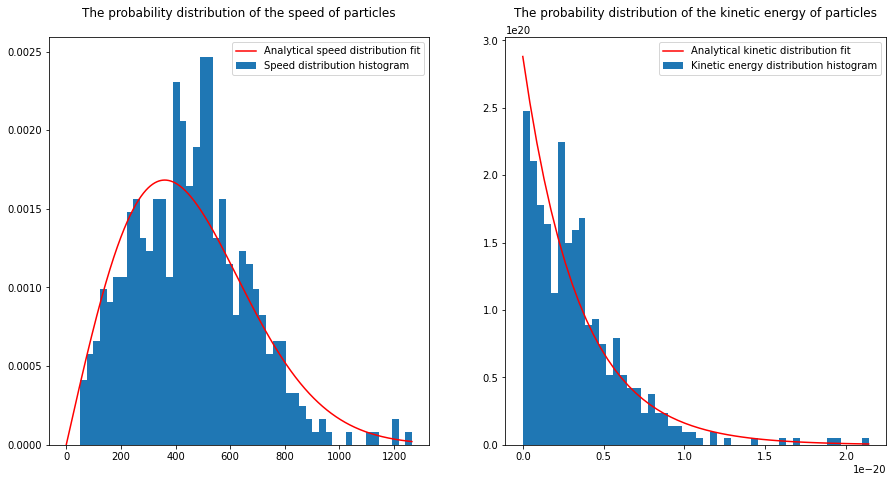

In [56]:
from scipy.optimize import curve_fit

# Calculate the magnitude of the velocity based on
# its x and y components
vel_mag = np.sqrt(vx ** 2 + vy  ** 2)

# Calculate the kinetic energy of all particles
kinetic_energy = 0.5 * p_mass * vel_mag **2

# Define functions

# Maxwell-Boltzmann distribution of speed
def fv(v, T):
    """
    Calculates the Maxwell-Boltzmann distribution of speed
    based on the velocity and temperature and returns it.

    Keyword arguments:
        v -- Velocity magnitude
        T -- Temperature of the system

    Return:
        A number that is the Maxwell-Boltzmann distribution
        of speed.
    """

    coef = (p_mass * v) / (kB * T)
    exponent = -(p_mass * (v ** 2)) / (2 * kB * T)
    return coef * np.exp(exponent)

# Maxwell-Boltzmann distribution
def gE(E, T):
    """
    Calculates the Maxwell-Boltzmann distribution based on
    the kinetic energy and temperature and returns it.

    Keyword arguments:
        v -- Velocity magnitude
        T -- Temperature of the system

    Return:
        A number that is the Maxwell-Boltzmann distribution.
    """

    coef = 1 / (kB * T)
    exponent = -(E) / (kB * T)
    return coef * np.exp(exponent)

# Create the figure and plots
fig, axes = plt.subplots(1, 2) # 1 row 2 columns

# Update the figure width and height dimensions
fig.set_figheight(7.5)
fig.set_figwidth(15)

# Define number of bins
nbins = 50

# Create the histogram chart
n1, bins1, patches1 = axes[0].hist(vel_mag, nbins, density=True)

# Create the curve fit
params, pcov = curve_fit(fv, bins1[0:nbins], n1, p0 = 240)
temp = params[0]

# Create the 2nd curve fit
n2, bins2, patches2 = axes[1].hist(kinetic_energy, nbins, density=True)

# Find the one standard deviation error of temperature
perr = float(np.sqrt(np.diag(pcov)))
perr_2_sig_fig = f"{perr:.2g}"
num_of_decimal = perr_2_sig_fig[::-1].find('.')
if(num_of_decimal == -1): num_of_decimal = 0


# Print the temperature and its uncertainty
print(f"The gas temperature is {temp:.{num_of_decimal}f} ± {perr_2_sig_fig} K.") 

# Plot the boltzmann distribution of the speed
fit_1_x = np.arange(bins1[np.argmax(bins1)])
axes[0].plot(fit_1_x, fv(fit_1_x, *params), 'r')
axes[0].set_title("The probability distribution of the "\
                  "speed of particles",  pad=20)
axes[0].legend(["Analytical speed distribution fit", "Speed distribution histogram"])

# Plot the distribution of energy of the particles
fit_2_x = np.linspace(0, max(bins2), 50)
axes[1].set_title("The probability distribution of the "\
                  "kinetic energy of particles", pad=20)

axes[1].plot(fit_2_x, gE(fit_2_x, *params), 'r')
axes[1].legend(["Analytical kinetic distribution fit", "Kinetic energy distribution histogram"])
